<a href="https://colab.research.google.com/github/Vigneshhh17/Retail-sales-analysis/blob/main/Retail_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Retail Data Analysis**

Overview: This project focuses on analysing retail sales data to identify revenue trends, bestselling products, and categorywise performance.


In [ ]:
#Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import datetime

In [ ]:
#iMPORTING DATA
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = 'https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/ecommerce_data.zip'
zipresp = urlopen(zipurl)
tempzip = open("/tmp/tempfile.zip", "wb")
tempzip.write(zipresp.read())
tempzip.close()
zf = ZipFile("/tmp/tempfile.zip")
zf.extractall(path = '')
zf.close()

df = pd.read_csv("ecommerce_data.csv", encoding = 'ISO-8859-1')


In [ ]:
df.head(25)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.isnull().sum().sort_values(ascending = False) #Many customer IDs are missing.

,0
CustomerID,135080
Description,1454
StockCode,0
InvoiceNo,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


In [ ]:
df[df.isnull().any(axis=1)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/2010 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/2010 14:32,0.43,NaN,United Kingdom


In [ ]:
# changing the invoicedate format from String to Timestamp format
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [ ]:
df.info() #Invoicedate changed from object to datetime datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#creating new dataframe without NaN values.
df_no_missing = df.dropna()

In [ ]:
df_no_missing.isnull().sum().sort_values(ascending = False)#Missing values removed

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df2 = df_no_missing.copy()#renaming

In [ ]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


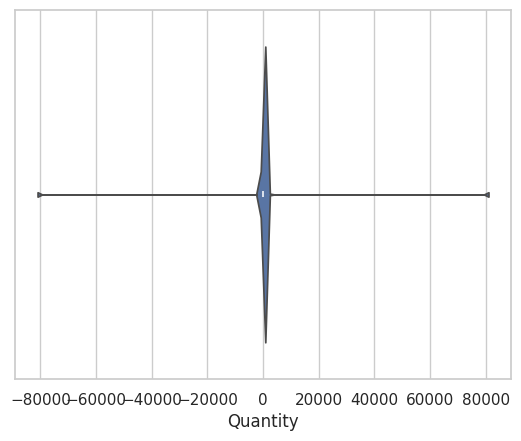

In [ ]:
#checking data disr=tribution using violin plot
sns.set(style="whitegrid")
ax = sns.violinplot(x=df2["Quantity"])

In [ ]:
#removing negative values
df2 = df2[df2.Quantity > 0]
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.000000,397924,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.420210,NaN,22.096788,1713.169877


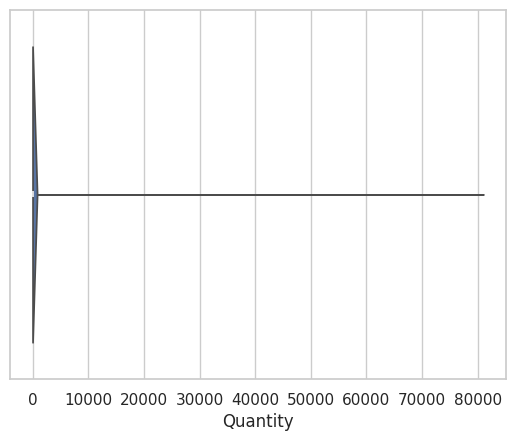

In [ ]:
ax =sns.violinplot(x=df2["Quantity"])

In [ ]:
#Adding  another column for total amount spent
df2['AmountSpent'] = df2['Quantity'] * df2['UnitPrice']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Starting with Month_Year First
df2['month_year'] = df2['InvoiceDate'].dt.to_period('M')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [ ]:
df2['year'] = df2['InvoiceDate'].dt.year
df2['month'] = df2['InvoiceDate'].dt.month
df2['day'] = df2['InvoiceDate'].dt.day
df2['dayofweek'] = df2['InvoiceDate'].dt.dayofweek
df2['dayofyear'] = df2['InvoiceDate'].dt.dayofyear
df2['quarter'] = df2['InvoiceDate'].dt.quarter
df2['weekofyear'] = df2['InvoiceDate'].dt.isocalendar().week

df2.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,quarter,weekofyear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010,12,1,2,335,4,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,2,335,4,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010,12,1,2,335,4,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,2,335,4,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,2,335,4,48


In [ ]:
df2.dayofweek.unique()

array([2, 3, 4, 6, 0, 1], dtype=int32)

**Analysing the Data**

In [ ]:
# Consolidating the number of Sales Made per customer for each country
sales_per_cust = df2.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
sales_per_cust.columns = ['CustomerID', 'Country', "NumberOfSales"]
sales_per_cust.head(10)

,CustomerID,Country,NumberOfSales
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700
2185,15311.0,United Kingdom,2379
1698,14646.0,Netherlands,2080
570,13089.0,United Kingdom,1818
699,13263.0,United Kingdom,1677
1443,14298.0,United Kingdom,1637


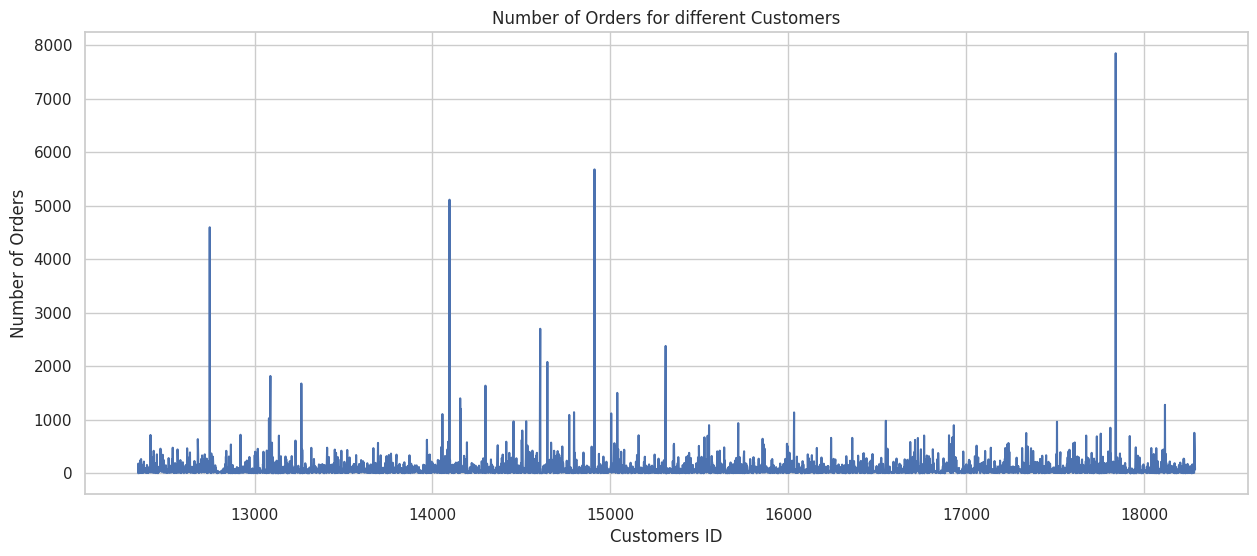

In [ ]:
# Visualizing No. of Sales for all Customers

orders = df2.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [ ]:
# Consolidating the number of Sales Made per customer (Revenue)
spent_per_cust = df2.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum().sort_values(by='AmountSpent', ascending=False)
spent_per_cust.columns = ['CustomerID', 'Country', "TotalSpent"]
spent_per_cust.head(10)

,CustomerID,Country,TotalSpent
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143825.06
57,12415.0,Australia,124914.53
1342,14156.0,EIRE,117379.63
3780,17511.0,United Kingdom,91062.38
2711,16029.0,United Kingdom,81024.84
0,12346.0,United Kingdom,77183.60



Purchasing Pattern

In [ ]:
# Inserting a new column as our 3rd row with year_month by joining our year with month from our InvoiceDate field
df2.insert(loc=2, column='year_month', value=df2['InvoiceDate'].map(lambda x: 100*x.year + x.month)) #e.g 2010-12 becomes 201012

# Inserting  a new column as our 6th column (index 5) with our Hour extracted from InvoiceDate
df2.insert(loc=5, column='hour', value=df2.InvoiceDate.dt.hour)

In [ ]:
df2.head()

,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,quarter,weekofyear
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010,12,1,2,335,4,48
1,536365,71053,201012,WHITE METAL LANTERN,6,8,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,2,335,4,48
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010,12,1,2,335,4,48
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,8,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,2,335,4,48
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,8,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,2,335,4,48


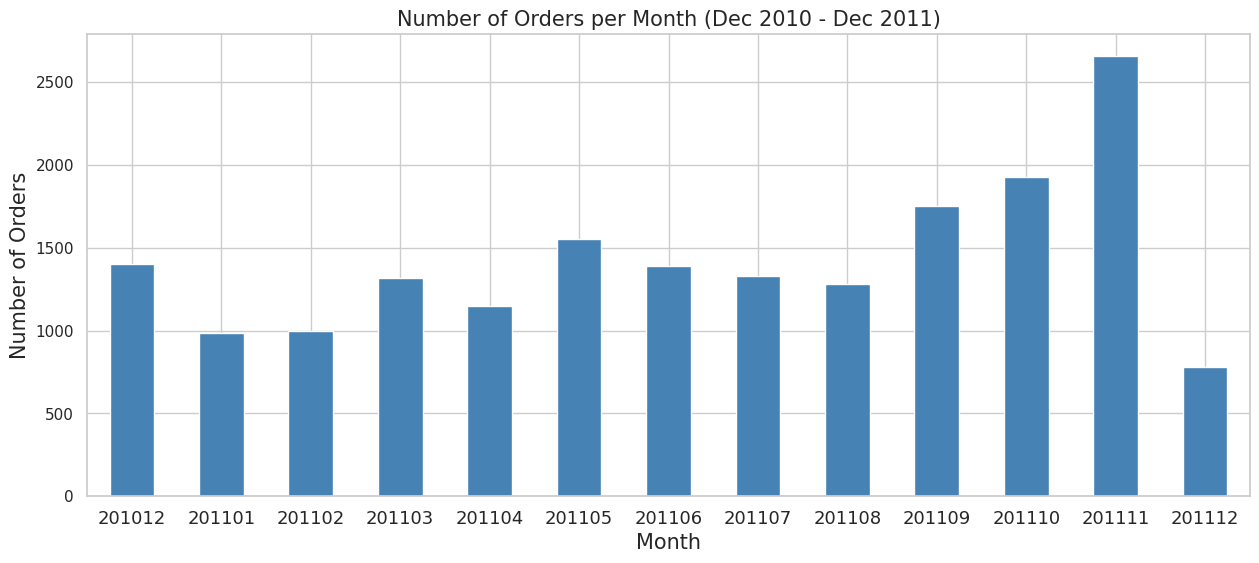

In [ ]:
#Consolidating by Month

ax = (df2.groupby('year_month')['InvoiceNo'].nunique()
       .sort_index().plot(kind='bar', figsize=(15,6), color='steelblue')
)

ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of Orders per Month (Dec 2010 - Dec 2011)', fontsize=15)
plt.xticks(rotation=0, fontsize=13)
plt.show()


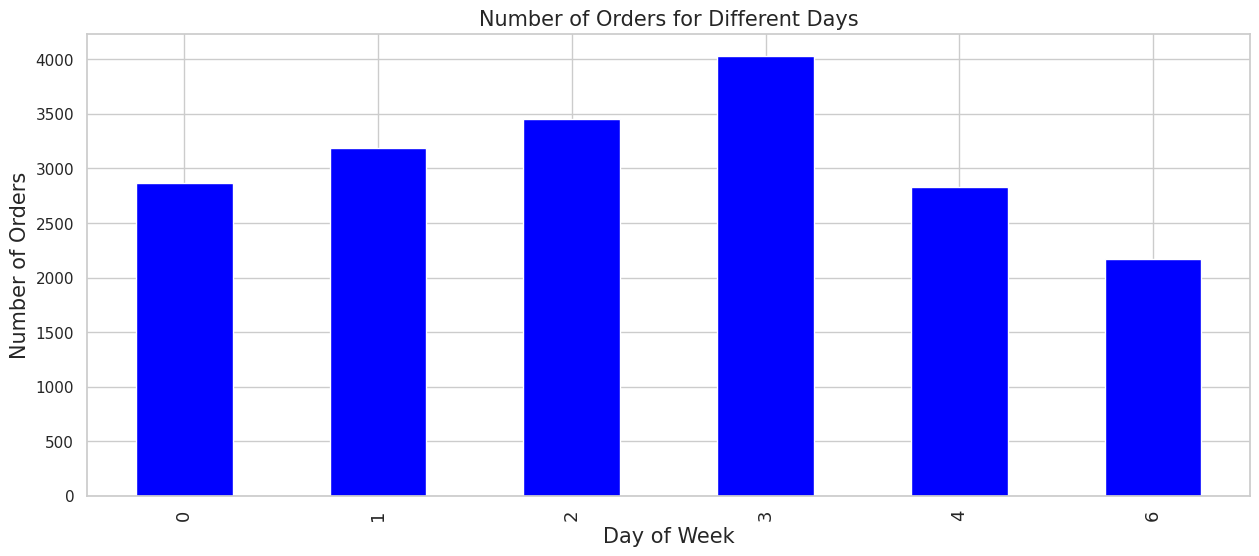

In [ ]:

ax = (df2.groupby('dayofweek')['InvoiceNo'].nunique().sort_index().plot(kind='bar', figsize=(15,6), color='blue')
)
ax.set_xlabel('Day of Week', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of Orders for Different Days', fontsize=15)
plt.xticks(fontsize=13)
plt.show()


In [ ]:
df2.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index()

,count
dayofweek,
[0],2863
[1],3185
[2],3455
[3],4033
[4],2831
[6],2169


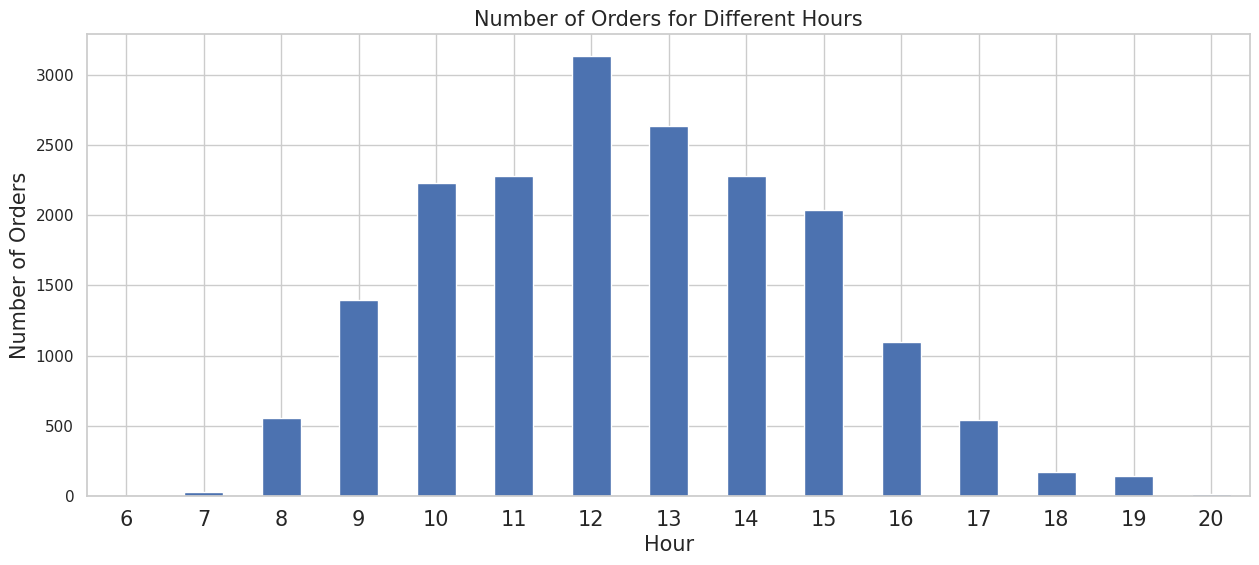

In [ ]:
#Consolidating by hours
ax = (
    df2.groupby('hour')['InvoiceNo'].nunique().sort_index().plot(kind='bar', figsize=(15, 6))
)

ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of Orders for Different Hours', fontsize=15)
plt.xticks(rotation='horizontal', fontsize=15)

plt.show()

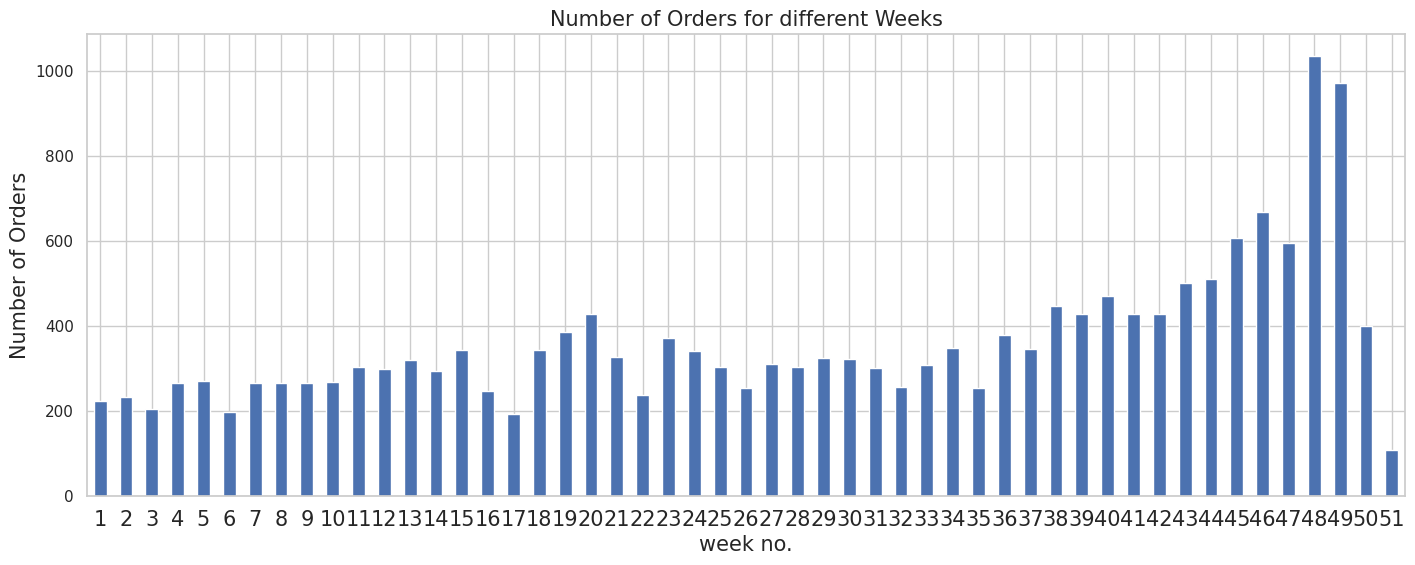

In [ ]:
#Consolidating orders by week of the year
ax = (df2.groupby('weekofyear')['InvoiceNo'].nunique().sort_index().plot(kind='bar', figsize=(17, 6)))

ax.set_xlabel('week no.', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of Orders for different Weeks', fontsize=15)
plt.xticks(rotation='horizontal', fontsize=15)

plt.show()

Analysis per Country

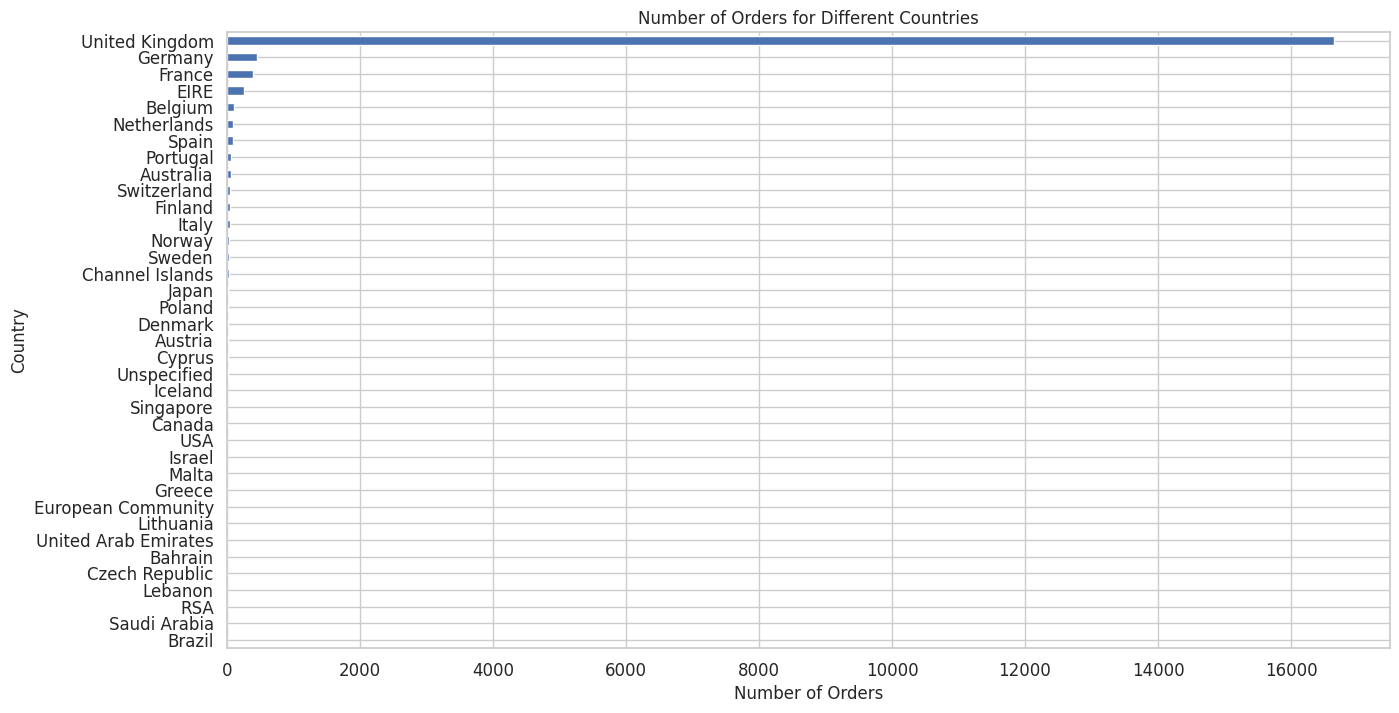

In [ ]:
# Number of orders per country
group_country_orders = (
    df2.groupby('Country')['InvoiceNo'].nunique().sort_values()
)
plt.figure(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)

plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for Different Countries', fontsize=12)

plt.show()


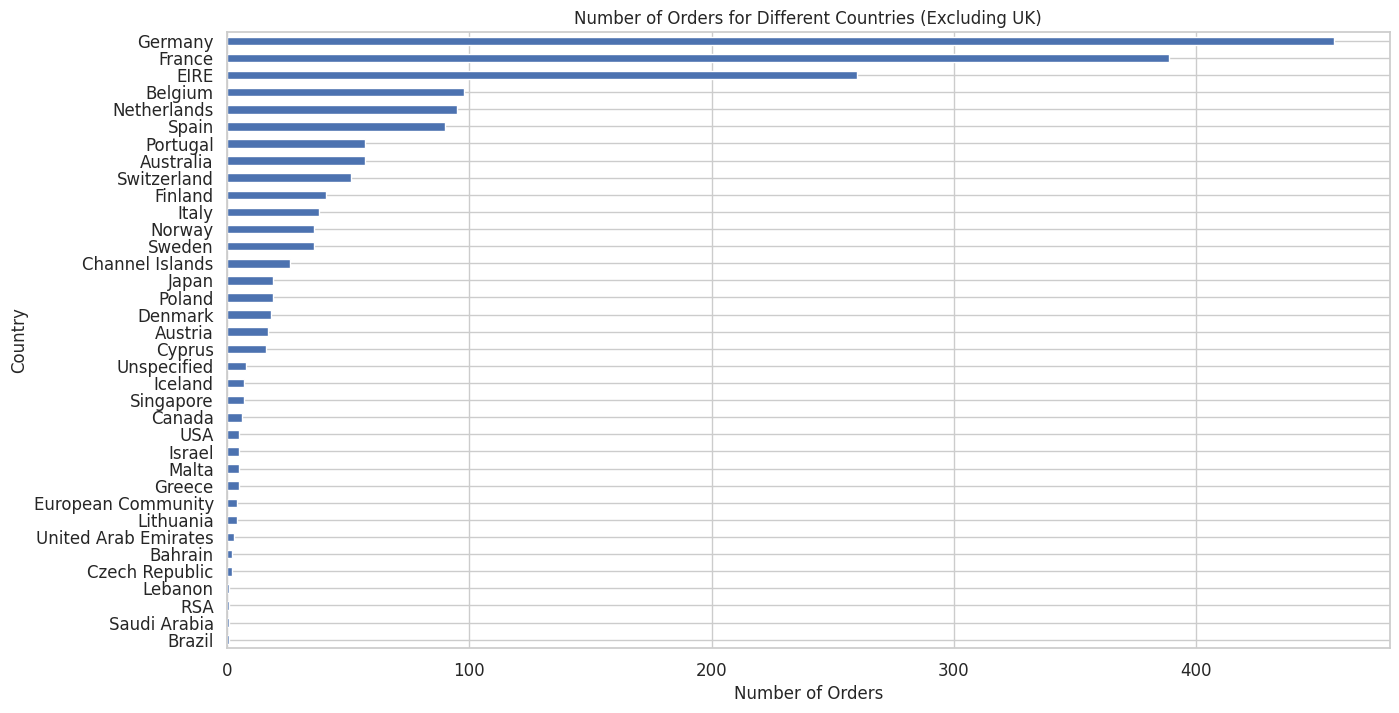

In [ ]:
# Number of orders per country without UK(outlier)
group_country_orders = (
    df2.groupby('Country')['InvoiceNo'].nunique().sort_values()
)

group_country_orders_without_uk = group_country_orders.drop('United Kingdom')
plt.figure(figsize=(15,8))
group_country_orders_without_uk.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for Different Countries (Excluding UK)', fontsize=12)

plt.show()


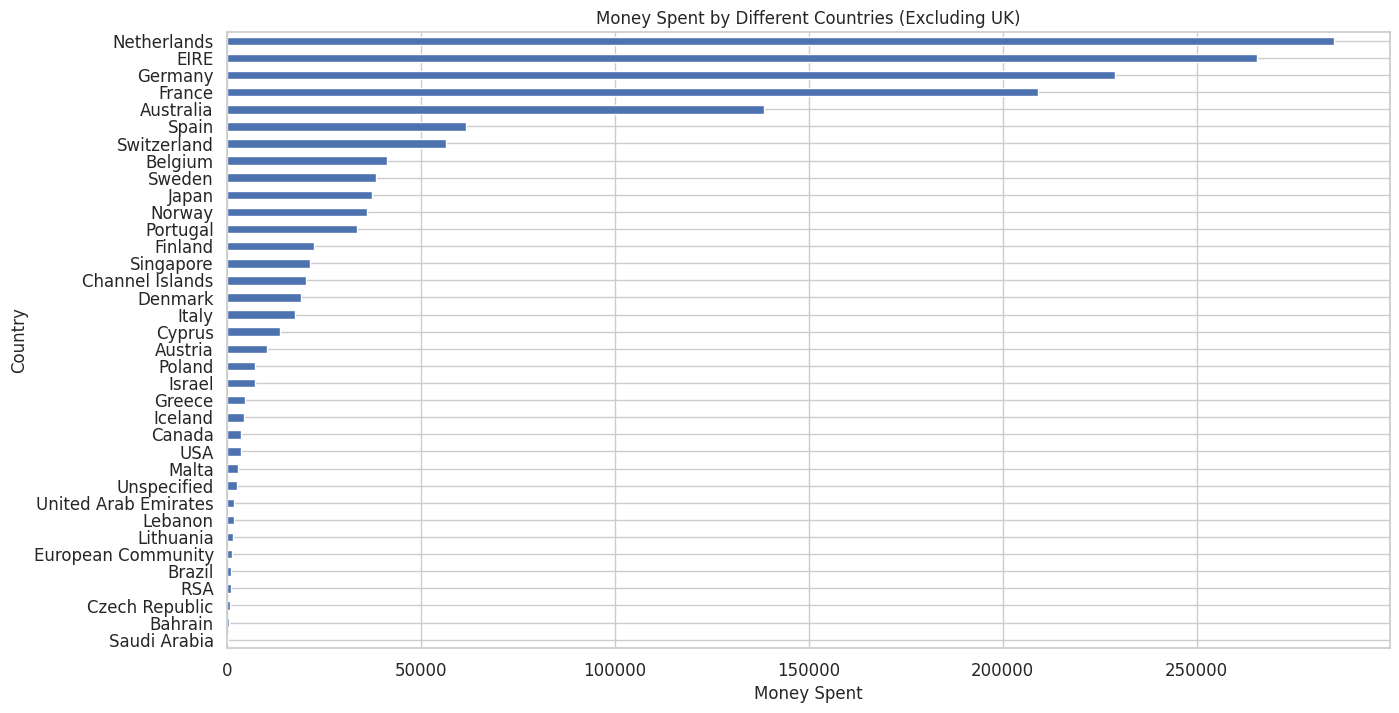

In [ ]:
# Total amount spent per country excluding U.K
group_country_amount_spent = (
    df2.groupby('Country')['AmountSpent'].sum().sort_values()
)

group_country_amount_spent_without_uk = group_country_amount_spent.drop('United Kingdom')
plt.figure(figsize=(15,8))
group_country_amount_spent_without_uk.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by Different Countries (Excluding UK)', fontsize=12)

plt.show()


In [ ]:
#Finding Repeat Customers
repeat_customers = df2.groupby('CustomerID')['InvoiceNo'].nunique()
repeat_customers = repeat_customers[repeat_customers > 1]

repeat_customers.head()


,InvoiceNo
CustomerID,
12347.0,7
12348.0,4
12352.0,8
12356.0,3
12358.0,2


In [ ]:
unique_customers = df2['CustomerID'].nunique()
print("Total unique customers:", unique_customers)


Total unique customers: 4339


In [ ]:

df2 = df2.sort_values('InvoiceDate')
df2['is_first_order'] = ~df2.duplicated(subset='CustomerID')
customers_over_time = df2.groupby('year_month').agg(
    new_customers = ('is_first_order', 'sum'),          # first-time customers in that month
    total_customers = ('CustomerID', 'nunique')         # unique customers in that month
)

customers_over_time['repeat_customers'] = (
    customers_over_time['total_customers'] - customers_over_time['new_customers']
)

customers_over_time.head()


,new_customers,total_customers,repeat_customers
year_month,,,
201012,885,885,0
201101,417,741,324
201102,380,758,378
201103,452,974,522
201104,300,856,556


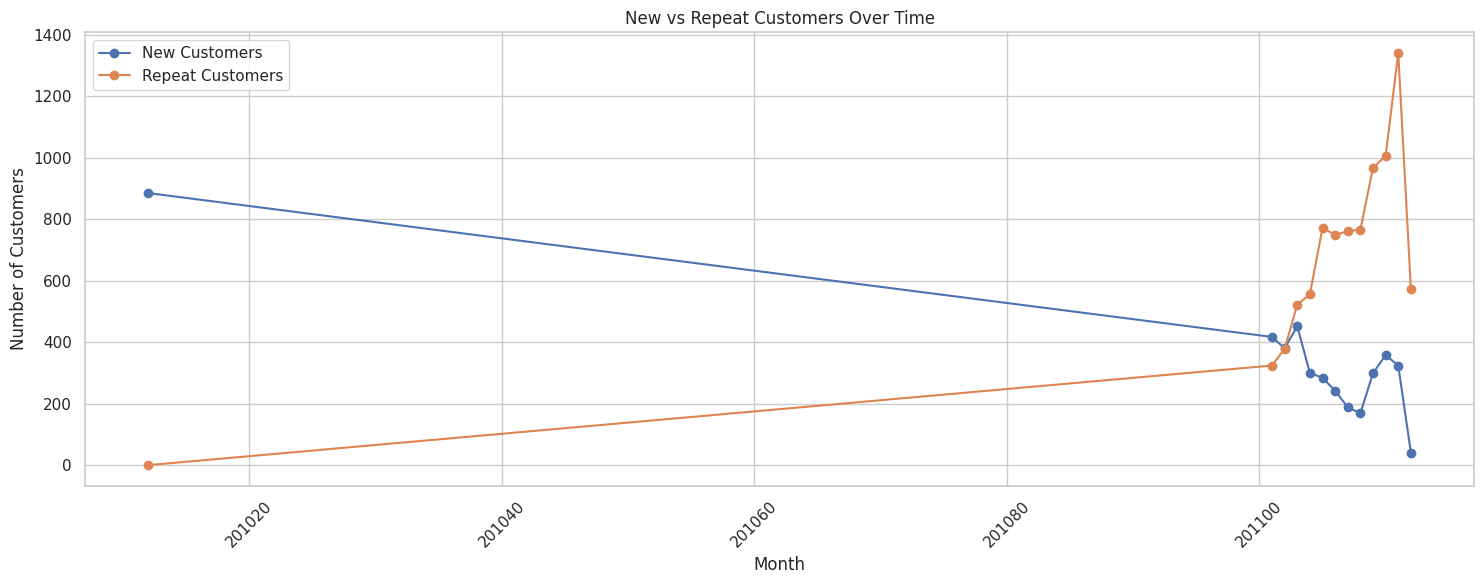

In [ ]:
#plotting unique vs repeat customers overtime.
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
customers_over_time['new_customers'].plot(label='New Customers', marker='o')
customers_over_time['repeat_customers'].plot(label='Repeat Customers', marker='o')

plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('New vs Repeat Customers Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Item Trends**

In [ ]:
date_item_df = df2.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

date_item_df.head(20)

/tmp/ipython-input-2076225093.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_item_df = df2.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()


InvoiceDate  StockCode
2010-12-31   10002        224
             10120         16
             10123C         1
             10124A         4
             10124G         5
             10125        143
             10133        123
             10135        366
             11001         65
             15034         38
             15036        132
             15039         17
             15044A         6
             15044B         2
             15044C         7
             15056BL      183
             15056N       132
             15056P        71
             15058A         1
             15058B         1
Name: Quantity, dtype: int64

In [ ]:
# Rank items by the last month's sales
last_month_sorted_df = date_item_df.loc['2011-11-30']
last_month_sorted_df = last_month_sorted_df.reset_index()
last_month_sorted_df.sort_values(by='Quantity', ascending=False).head(10)

,StockCode,Quantity
2371,84826,12551
1567,23084,12393
827,22197,8458
738,22086,5919
2488,85099B,5678
2385,84879,5190
1135,22578,4981
2498,85123A,4861
1134,22577,4582
2278,84077,4500


In [ ]:
date_item_df = df.loc[df['StockCode'].isin(['23084', '84826', '22197', '22086', '85099B'])].set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

date_item_df

/tmp/ipython-input-1619342914.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()


InvoiceDate  StockCode
2010-12-31   22086         2453
             22197         2731
             84826          306
             85099B        2126
2011-01-31   22086           24
             22197         1809
             84826          480
             85099B        2639
2011-02-28   22086            5
             22197         2663
             84826           66
             85099B        3078
2011-03-31   22086           87
             22197         2798
             84826           60
             85099B        5281
2011-04-30   22086          -27
             22197         1856
             84826            1
             85099B        2452
2011-05-31   22086           17
             22197         6848
             23084         1131
             85099B        3617
2011-06-30   22086          344
             22197         2092
             23084         1693
             84826            4
             85099B        3676
2011-07-31   22086          377
             22197         1862
             23084          318
             84826            2
             85099B        3126
2011-08-31   22086          370
             22197         5416
             23084         1783
             84826           72
             85099B        5401
2011-09-30   22086         2106
             22197         4153
             23084          196
             85099B        4267
2011-10-31   22086         3189
             22197         5865
             23084         6344
             84826           11
             85099B        4803
2011-11-30   22086         7868
             22197        12159
             23084        14883
             84826        12551
             85099B        5807
2011-12-31   22086         2089
             22197         6198
             23084         4298
             84826           92
             85099B        1090
Name: Quantity, dtype: int64

In [ ]:
#  monthly trend of each of the top 5 items

trending_items_df = date_item_df.reset_index().pivot_table(
    index='InvoiceDate',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum'
).fillna(0)

trending_items_df



StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2453.0,2731.0,0.0,306.0,2126.0
2011-01-31,24.0,1809.0,0.0,480.0,2639.0
2011-02-28,5.0,2663.0,0.0,66.0,3078.0
2011-03-31,87.0,2798.0,0.0,60.0,5281.0
2011-04-30,-27.0,1856.0,0.0,1.0,2452.0
2011-05-31,17.0,6848.0,1131.0,0.0,3617.0
2011-06-30,344.0,2092.0,1693.0,4.0,3676.0
2011-07-31,377.0,1862.0,318.0,2.0,3126.0
2011-08-31,370.0,5416.0,1783.0,72.0,5401.0


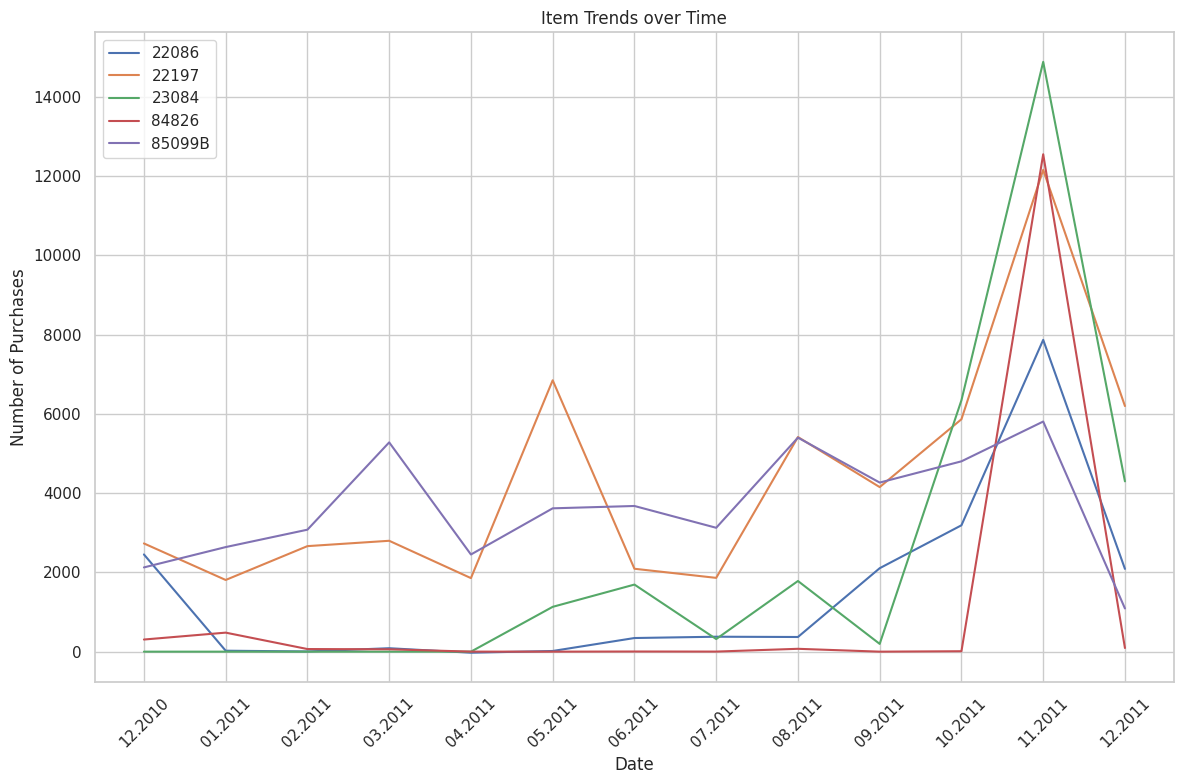

In [ ]:
# Plot the above information
ax = pd.DataFrame(trending_items_df.values).plot(figsize=(12,8), grid=True)

ax.set_ylabel('Number of Purchases')
ax.set_xlabel('Date')
ax.set_title('Item Trends over Time')

ax.legend(trending_items_df.columns, loc='upper left')

plt.xticks(
    range(len(trending_items_df.index)),
    [x.strftime('%m.%Y') for x in trending_items_df.index],
    rotation=45
)

plt.tight_layout()
plt.show()


SUMMARY:
In this project, sales data from a retail store was studied to understand how people shop and what they buy. The data was cleaned and turned into graphs so it became easier to see patterns.

The project showed which products are sold the most(**Stock Code 23084)**, which countries buy more items**(UK & Germany)**, and at what time people place most orders(**1:00 p.m)**. It also helped identify customers who buy again and again. This helps the store know when to stock more items and which products are most popular.